In [116]:
DATA_PATH = 'C:\\Users\\Thrax\\Stackover_survey\\Survey_analysis\\data\\processed\\preprocessed_df.pkl'
EXPORT_DIR  = 'C:\\Users\\Thrax\\Stackover_survey\\Survey_analysis\\data\\processed\\'
ROLE_COLS      = ['DevType']
TECH_COLS      = ['LanguageWorkedWith',    'DatabaseWorkedWith',    'WebframeWorkedWith',    'MiscTechWorkedWith',    ]
TECH_NEXT_COLS = ['LanguageDesireNextYear','DatabaseDesireNextYear','WebframeDesireNextYear','MiscTechDesireNextYear',]


## Import tools

In [120]:
# Reading data and preprocessing
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler


# visualize
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
sns.set()

# clustering and PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression


# Model metrics

from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score

# Avoid display warnings 
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 300)

## Read the data and preprocess

In [3]:
df = pd.read_pickle(DATA_PATH)
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13.0,Monthly,NaN,NaN,Germany,European Euro,EUR,[Microsoft SQL Server],"[Elasticsearch, Microsoft SQL Server, Oracle]","[Developer, desktop or enterprise applications...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",[White or of European descent],[Man],"[Languages, frameworks, and other technologies...",Slightly satisfied,I am not interested in new job opportunities,"[C#, HTML/CSS, JavaScript]","[C#, HTML/CSS, JavaScript]","[.NET Core, Xamarin]","[.NET, .NET Core]","[Microsoft Teams, Microsoft Azure, Trello]","[Confluence, Jira, Slack, Microsoft Azure, Tre...",No,Somewhat important,Fairly important,[],[],Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,"[Start a free trial, Ask developers I know/wor...",Amused,[Stack Overflow (public Q&A for anyone who cod...,"[Visit Stack Overflow, Go for a walk or other ...",Windows,2 to 9 employees,"[Android, iOS, Kubernetes, Microsoft Azure, Wi...",[Windows],NaN,[Straight / Heterosexual],No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",[ASP.NET Core],"[ASP.NET, ASP.NET Core]",Just as welcome now as I felt last year,50.0,36.0,27.0
1,2,I am a developer by profession,No,NaN,19.0,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,[],[],"[Developer, full-stack, Developer, mobile]","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,[],[],[],Very dissatisfied,I am not interested in new job opportunities,"[Python, Swift]","[JavaScript, Swift]","[React Native, TensorFlow, Unity 3D]",[React Native],"[Github, Slack]","[Confluence, Jira, Github, Gitlab, Slack]",NaN,NaN,Fairly important,[],[],Once a year,Not sure,NaN,No,NaN,[],Amused,[Stack Overflow (public Q&A for anyone who cod...,"[Visit Stack Overflow, Go for a walk or other ...",MacOS,"1,000 to 4,999 employees","[iOS, Kubernetes, Linux, MacOS]",[iOS],I have little or no influence,[],Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",[],[],Somewhat more welcome now than last year,NaN,7.0,4.0
2,3,I code primarily as a hobby,Yes,NaN,15.0,NaN,NaN,NaN,Russian Federation,NaN,NaN,[],[],[],NaN,NaN,[],[],[],NaN,NaN,"[Objective-C, Python, Swift]","[Objective-C, Python, Swift]",[],[],[],[],NaN,NaN,NaN,[],[],Once a decade,NaN,NaN,No,NaN,[],NaN,[Stack Overflow (public Q&A for anyone who cod...,[],Linux-based,NaN,[],[],NaN,[],Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,[],[],Somewhat more welcome now than last year,NaN,4.0,NaN
3,4,I am a developer by profession,Yes,25.0,18.0,NaN,NaN,NaN,Albania,Albanian lek,ALL,[],[],[],"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,[White or of European descent],[Man],"[Flex time or a flexible schedule, Office envi...",Slightly dissatisfied,"I’m not actively looking, but I am open to new...",[],[],[],[],[],[],No,NaN,Not at all important/not necessary,"[Curious about other opportunities, Wanting to...",[],Once a year,Not sure,Yes,Yes,Occas

In [4]:
# Enconde the important categorical columns by ' 1-hot encode '
encoded_tech = pd.DataFrame()

for col in TECH_COLS:
    binarizer = MultiLabelBinarizer()
    encoded_col = pd.DataFrame(binarizer.fit_transform(df[col]), columns=binarizer.classes_, index=df[col].index)
    encoded_tech = pd.concat([encoded_tech, encoded_col], axis=1)
 

encoded_tech.head()

,Assembly,Bash/Shell/PowerShell,C,C#,C++,Dart,Go,HTML/CSS,Haskell,Java,JavaScript,Julia,Kotlin,Objective-C,PHP,Perl,Python,R,Ruby,Rust,SQL,Scala,Swift,TypeScript,VBA,Cassandra,Couchbase,DynamoDB,Elasticsearch,Firebase,IBM DB2,MariaDB,Microsoft SQL Server,MongoDB,MySQL,Oracle,PostgreSQL,Redis,SQLite,ASP.NET,ASP.NET Core,Angular,Angular.js,Django,Drupal,Express,Flask,Gatsby,Laravel,React.js,Ruby on Rails,Spring,Symfony,Vue.js,jQuery,.NET,.NET Core,Ansible,Apache Spark,Chef,Cordova,Flutter,Hadoop,Keras,Node.js,Pandas,Puppet,React Native,TensorFlow,Teraform,Torch/PyTorch,Unity 3D,Unreal Engine,Xamarin
0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Dimensionality reduction
#### tnse is a good method for reduction, the technique grouping the data accourding to similarity after projection

In [5]:
# Prepare sub data frames 
skills_encoded = encoded_tech.copy()
std_skills = StandardScaler().fit_transform(skills_encoded) # Normalize the features


In [6]:
tsne_projection = TSNE(n_components=2, 
                       perplexity=2.5, 
                       learning_rate=1, 
                       init='pca', 
                       method='barnes_hut', 
                       n_jobs=2, 
                       n_iter=10**4, 
                       random_state=0).fit_transform(std_skills.T) # Transpose the dataframe to label the skills


In [7]:
# Make the projection as a data-frame
tsne_df = pd.DataFrame(tsne_projection, index=skills_encoded.columns)
tsne_df.shape

(74, 2)

In [8]:
fig = px.scatter(x=tsne_df[0], y=tsne_df[1], text=tsne_df.index)
fig.update_traces(textposition='top center')
fig.update_layout(height=500, width=800, title_text='TSNE')
fig.show()

## K-mean clustering

<AxesSubplot:>

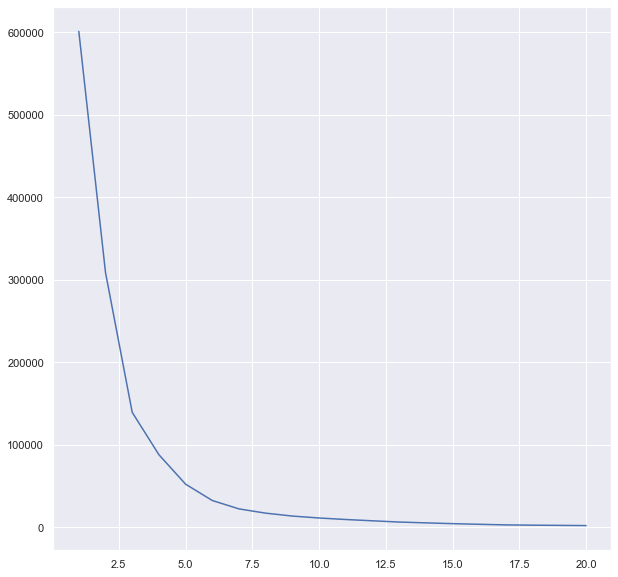

In [9]:
WCSS = []   # Within-Cluster Sum of Square

for i in range(1,21):
    clusters = KMeans(n_clusters=i, init='k-means++')
    clusters.fit(tsne_df)
    WCSS.append(clusters.inertia_)

plt.figure(figsize=(10,10))
sns.lineplot(range(1,21), WCSS)

## Agglomerative Clustering

In [10]:
sil_scores = []
best_cluster_model = None
best_score = 0

for i in range(5,25):
    cluster_model = AgglomerativeClustering(n_clusters=i, linkage='ward')
    cluster_labels = cluster_model.fit_predict(tsne_df) # fit the model

    silhouette_avg = silhouette_score(tsne_df, cluster_labels) # Get the silhouette score and append all results in list
    sil_scores.append(silhouette_avg)

    if silhouette_avg >= np.max(sil_scores):
        best_cluster_model = cluster_model
        best_score = i



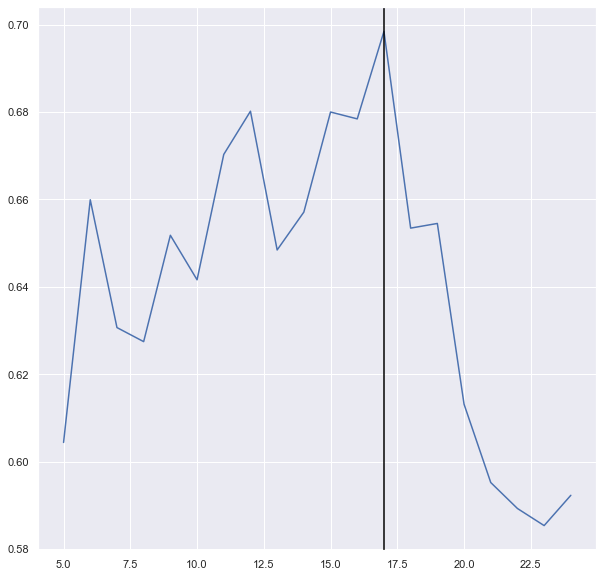

In [11]:
# Plot the best N clusters
plt.figure(figsize=(10,10))
sns.lineplot(range(5,25), sil_scores)
plt.axvline(best_score, color='black')


In [12]:
tsne_df['label'] = best_cluster_model.labels_.tolist() # Adding the label to DataFrame

for i in range(0,17):  # replace the numerical labels to real labels
    tsne_df['label'].replace(i, 'skills_group_'+ str(i), inplace=True)


In [13]:
# Plot the new clusters
fig = px.scatter(x=tsne_df[0], y=tsne_df[1], text=tsne_df.index, color=tsne_df['label'])
fig.update_traces(textposition='top center')
fig.update_layout(height=800, width=800, title_text='Skills clustering')
fig.show()


In [15]:
 # Get the clusters and the skills in dictionary format 
tsne_df['skill'] = tsne_df.index
skills_clusters = {}  
for label in tsne_df['label'].unique():
    skills_list = tsne_df[ tsne_df['label'] == label]['skill'].to_list()
    skills_clusters[label] = skills_list
    


In [16]:
for k,v  in skills_clusters.items():
    print(k)
    print(v)

skills_group_12
['Assembly', 'C', 'C++']
skills_group_5
['Bash/Shell/PowerShell', 'Perl', 'Python', 'Django', 'Flask']
skills_group_0
['C#', 'VBA', 'Microsoft SQL Server', 'ASP.NET', 'ASP.NET Core', '.NET', '.NET Core', 'Xamarin']
skills_group_14
['Dart', 'Firebase', 'Flutter']
skills_group_1
['Go', 'DynamoDB', 'Elasticsearch', 'PostgreSQL', 'Redis', 'Ansible', 'Teraform']
skills_group_10
['HTML/CSS', 'JavaScript', 'SQL', 'jQuery']
skills_group_6
['Haskell', 'Julia', 'Rust']
skills_group_9
['Java', 'Kotlin', 'IBM DB2', 'Oracle', 'Spring']
skills_group_16
['Objective-C', 'Swift']
skills_group_2
['PHP', 'MariaDB', 'MySQL', 'SQLite', 'Drupal', 'Laravel', 'Symfony', 'Vue.js']
skills_group_7
['R', 'Keras', 'Pandas', 'TensorFlow', 'Torch/PyTorch']
skills_group_11
['Ruby', 'Ruby on Rails']
skills_group_3
['Scala', 'Cassandra', 'Couchbase', 'Apache Spark', 'Hadoop']
skills_group_8
['TypeScript', 'Angular', 'Angular.js', 'Cordova']
skills_group_4
['MongoDB', 'Express', 'Gatsby', 'React.js', 'No

## Create new feature

In [67]:
# DataFrame will contain the new features
fe_clustered_skills = pd.DataFrame(index=encoded_tech.index) 

In [68]:
for cluster, skills in skills_clusters.items():
    cluster_sum = encoded_tech[skills].sum(axis=1)
    cluster_sum.name = cluster
    fe_clustered_skills = pd.concat([fe_clustered_skills, cluster_sum], axis=1)


## Illustration Model


In [50]:
# Making new encoded DataFrame for developers type
encoded_role = pd.DataFrame()

for col in ROLE_COLS:
    binarizer = MultiLabelBinarizer()
    encoded_col = pd.DataFrame(binarizer.fit_transform(df[col]), columns=binarizer.classes_, index=df[col].index)
    encoded_role = pd.concat([encoded_role, encoded_col], axis=1)
 

In [45]:
# Get the classes weights 
(1/encoded_role.loc[:,:].sum()).sort_values(ascending=True) # This will print the most dominated classes to lower classes

Developer, back-end                              0.000037
Developer, full-stack                            0.000037
Developer, front-end                             0.000055
Developer, desktop or enterprise applications    0.000085
Developer, mobile                                0.000105
DevOps specialist                                0.000168
Database administrator                           0.000175
Designer                                         0.000188
System administrator                             0.000191
Developer, embedded applications or devices      0.000211
Data or business analyst                         0.000249
Data scientist or machine learning specialist    0.000251
Developer, QA or test                            0.000253
Engineer, data                                   0.000268
Academic researcher                              0.000282
Educator                                         0.000342
Developer, game or graphics                      0.000359
Engineering ma

<AxesSubplot:>

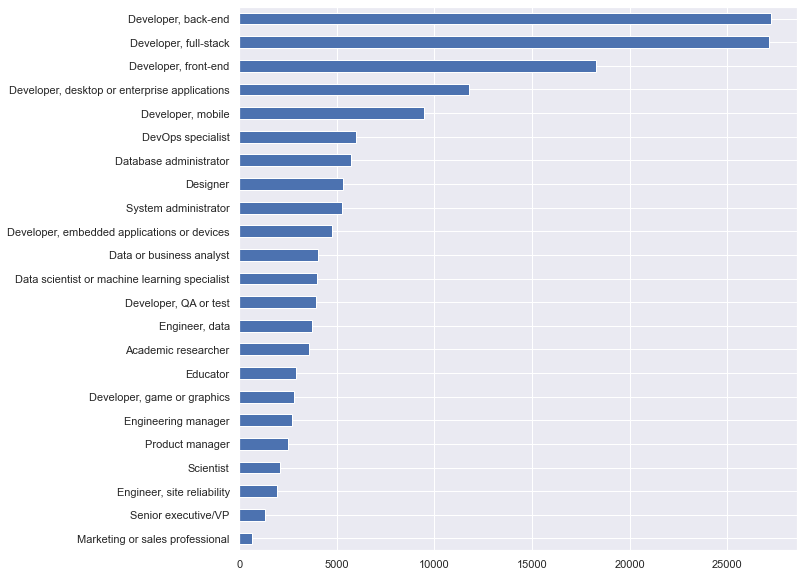

In [34]:
plt.figure(figsize=(10,10))
encoded_role.loc[:,:].sum().sort_values(ascending=True).plot(kind='barh')

In [41]:
pd.DataFrame(np.multiply(encoded_role.loc[:,:].sum().values, encoded_role.values).mean(axis=1))


,0
0,1691.695652
1,1591.608696
2,0.000000
3,0.000000
4,0.000000
...,...
64456,57.391304
64457,0.000000
64458,0.000000
64459,0.000000


## Create train / test matrices

In [92]:
features_df = pd.concat([fe_clustered_skills, encoded_tech], axis=1) # Features
roles_df = encoded_role.copy()  # Classes

In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(features_df, roles_df, test_size=0.3)

In [94]:
# Assign class weight as an inverse of its frequency 
class_weights = (1 / roles_df.sum(axis=0))
# Multiply class weights with the 1 hot encoded values and get the mean of each sample
sample_weight = np.multiply(class_weights.values, Y_train.values).mean(axis=1)


In [96]:
feature_sets = {'original': encoded_tech.columns.tolist(), 
                'clusters': fe_clustered_skills.columns.tolist()}

## Compare F1 score on the original and clustered data set

In [111]:
results = {}
for feature_set_name, feature_set in feature_sets.items():
    sub_train = X_train[feature_set].copy()
    sub_test = X_test[feature_set].copy()

    # Train classifier
    clf = MultiOutputClassifier(LogisticRegression())
    clf.fit(sub_train, Y_train, sample_weight=sample_weight)

    # Calculate F1 score for the training data
    y_pred = clf.predict(sub_train)
    f_score_train = f1_score(Y_train, y_pred, average='micro')
    print(f"Training score for {feature_set_name}, is : {f_score_train}")

    # Calculate F1 score for the testing data
    y_pred = clf.predict(sub_test)
    f_score_test = f1_score(Y_test, y_pred, average='micro')
    print(f"Test score for {feature_set_name}, is : {f_score_test}")
    print("-" * 10)


Training score for original, is : 0.406873661977902
Test score for original, is : 0.40646796295050347
----------
Training score for clusters, is : 0.43248537057158315
Test score for clusters, is : 0.43375666084733966
----------


## Export the new features

In [118]:
export_path = os.path.join(EXPORT_DIR, 'features_df.pkl')
fe_clustered_skills.to_pickle(export_path)
